In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [11]:
df=pd.read_csv("Netflix Dataset 1.csv",low_memory=False)
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4811 entries, 1 to 7785
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       4811 non-null   object
 1   Category      4811 non-null   object
 2   Title         4811 non-null   object
 3   Director      4811 non-null   object
 4   Cast          4811 non-null   object
 5   Country       4811 non-null   object
 6   Release_Date  4811 non-null   object
 7   Rating        4811 non-null   object
 8   Duration      4811 non-null   object
 9   Type          4811 non-null   object
 10  Description   4811 non-null   object
dtypes: object(11)
memory usage: 451.0+ KB


In [13]:
df.duplicated().value_counts()

False    7787
True        2
Name: count, dtype: int64

In [14]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [20]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [24]:
df["Duration"]=df["Duration"].str.replace("min","")
df["Duration"]=df["Duration"].str.replace("Season","")
df["Duration"]=df["Duration"].str.replace("Seasons","")
#df["Duration"]=df["Duration"].astype(int)
#df['Release_Date']=pd.to_datetime(df['Release_Date'])
#df["Year"]=df["Year"].astype(int)


In [26]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,4811,4811,4811,4811,4811,4811,4811,4811,4811,4811,4811
unique,4809,2,4809,3614,4689,544,1291,14,195,324,4804
top,s684,Movie,Backfire,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",TV-MA,93,"Dramas, International Movies",When Elastigirl gets recruited for a high-prof...
freq,2,4675,2,18,10,1655,100,1668,121,306,2


## Data Cleaning using GPT-5.0 Model

The dataset was preprocessed using the GPT-5.0 model, which guided the data cleaning and transformation process.
The model helped in:
1. Identifying missing and inconsistent data in columns such as Director, Cast, Country, and Rating.
2. Converting Release_Date into a proper datetime format and extracting a new Year column for trend analysis.
3. Parsing and separating the Duration column into two components — Duration_Num (numeric value) and Duration_Type (“Minutes” or “Season”).

In [29]:
df_cleaned=pd.read_csv("Netflix_Cleaned_Data.csv",low_memory=False)
df_cleaned.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Duration_Num,Duration_Type
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4.0,Season
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93.0,Minutes
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,78.0,Minutes
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,80.0,Minutes
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123.0,Minutes


### Distribution of Movies vs. TV Shows Over the Years

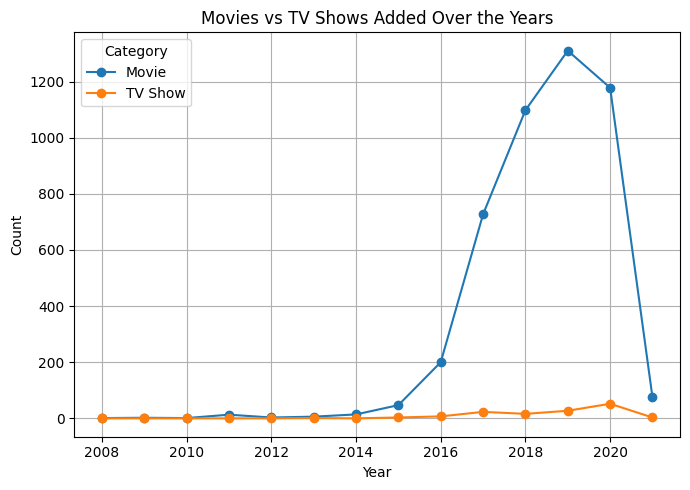

In [31]:
category_trend = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)
category_trend.plot(kind='line', marker='o', figsize=(7,5))
plt.title("Movies vs TV Shows Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation:
The line graph comparing Movies and TV Shows over time reveals that Movies consistently outnumber TV Shows in Netflix’s catalog. However, from around 2016 onward, the number of TV Shows began to rise significantly, showing Netflix’s strategic shift toward serialized content and original productions. The overall upward trend in both categories indicates continuous expansion of Netflix’s library, with peak additions around 2019–2020.

### Most Common Genres and Their Popularity

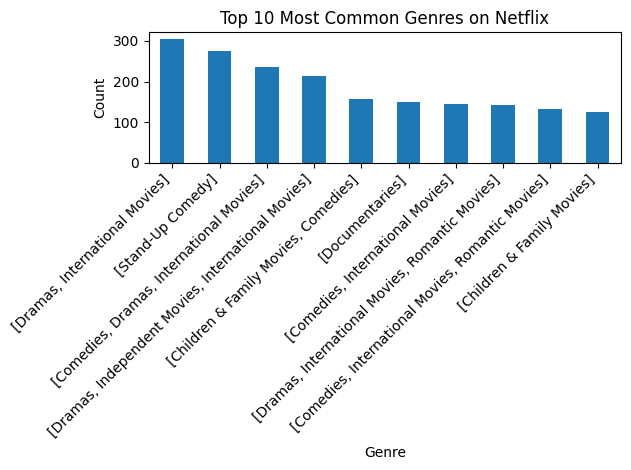

In [37]:

genre_expanded = df.dropna(subset=['Type']).copy()
genre_expanded['Genres'] = genre_expanded['Type'].str.split(', ')
genre_year = genre_expanded.explode('Genres').groupby(['Year', 'Genres']).size().unstack(fill_value=0)
# Top 10 most common genres overall
top_genres = genre_expanded['Genres'].value_counts().head(10)
top_genres.plot(kind='bar')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interpretation:
The bar chart of top genres highlights that International Movies, Dramas, and Comedies dominate Netflix’s content. The popularity of International and Documentary genres indicates Netflix’s growing global focus and diversification of content to appeal to wider audiences. Meanwhile, Action & Adventure and Children & Family content remain consistent staples, reflecting Netflix’s efforts to serve all age groups.

### Country-Wise Contributions to Netflix’s Catalog

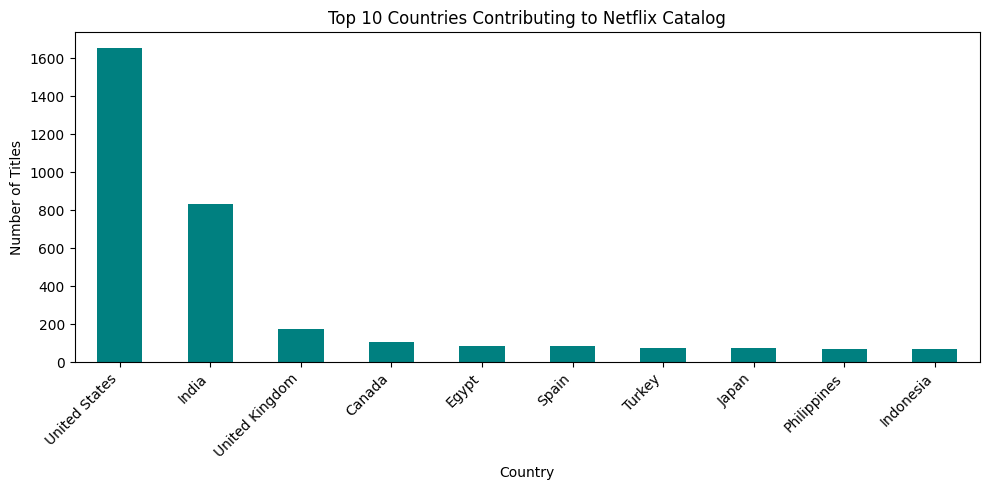

In [ ]:
country_counts = df['Country'].value_counts().head(10)
country_counts.plot(kind='bar', figsize=(10,5), color='teal')
plt.title("Top 10 Countries Contributing to Netflix Catalog")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interpretation:
The top contributing countries are led by the United States, followed by India, United Kingdom, Canada, and France. This distribution shows that while Netflix’s core content is still dominated by the U.S., it has increasingly embraced regional cinema, especially from India and other international markets. The presence of multiple countries in the top 10 illustrates Netflix’s global content strategy and its investment in localized productions.

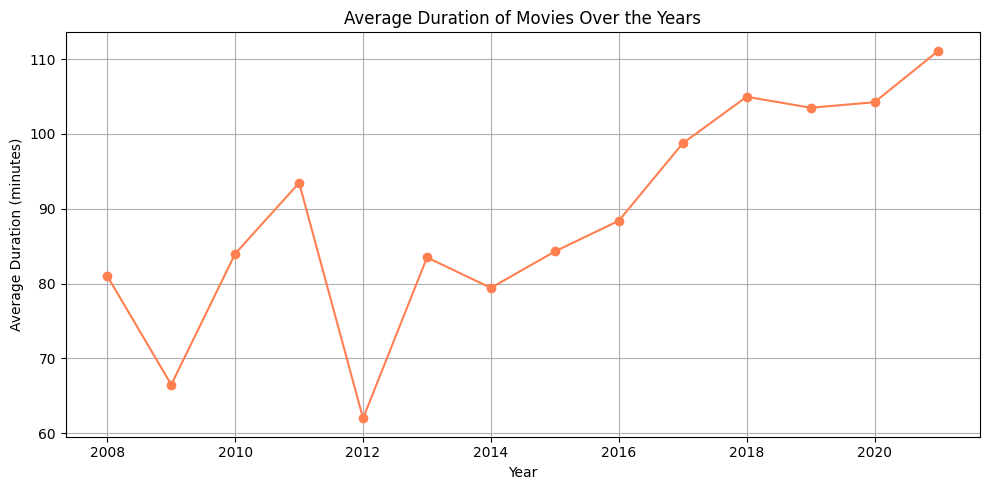

In [ ]:
movies = df[df['Category'] == 'Movie']
avg_duration = movies.groupby('Year')['Duration_Num'].mean()
avg_duration.plot(kind='line', figsize=(7,5), marker='o', color='coral')
plt.title("Average Duration of Movies Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Duration (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


Interpretation:
The average movie duration fluctuates between 90–110 minutes, showing that Netflix maintains a standard film length consistent with global cinema norms. No major downward trend indicates Netflix hasn’t significantly shortened its movie format, even as it expands regionally.

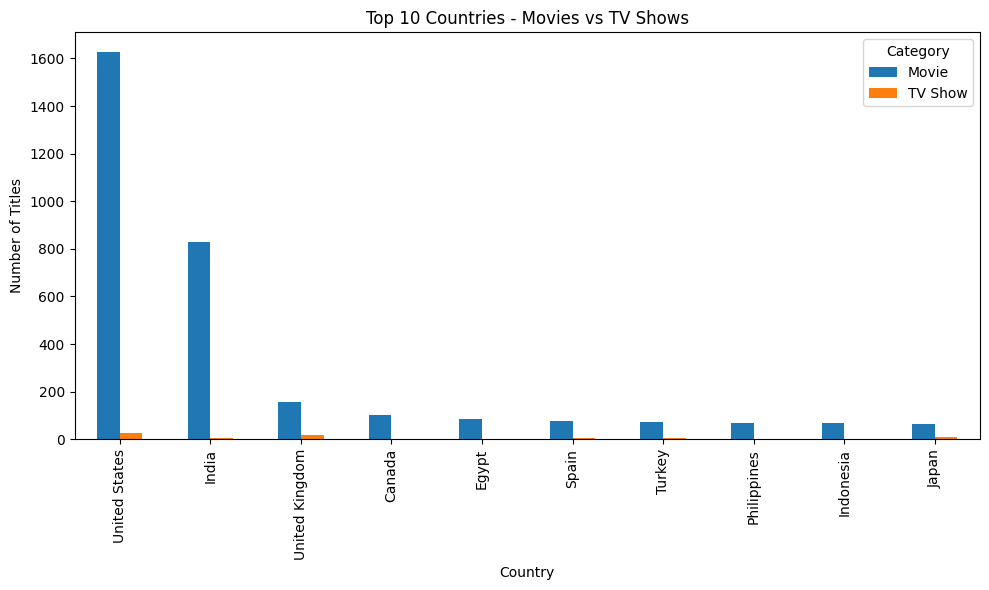

In [40]:
country_category = df.groupby(['Country', 'Category']).size().unstack(fill_value=0)
top_countries = country_category.sort_values(by='Movie', ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(10,6))
plt.title("Top 10 Countries - Movies vs TV Shows")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

Interpretation:
The United States leads both Movies and TV Shows, but India, the UK, and Japan are catching up quickly. India produces a significantly larger number of movies, while the U.S. and UK dominate TV shows. This emphasizes Netflix’s localization strategy — leveraging Indian cinema and Western serialized storytelling.

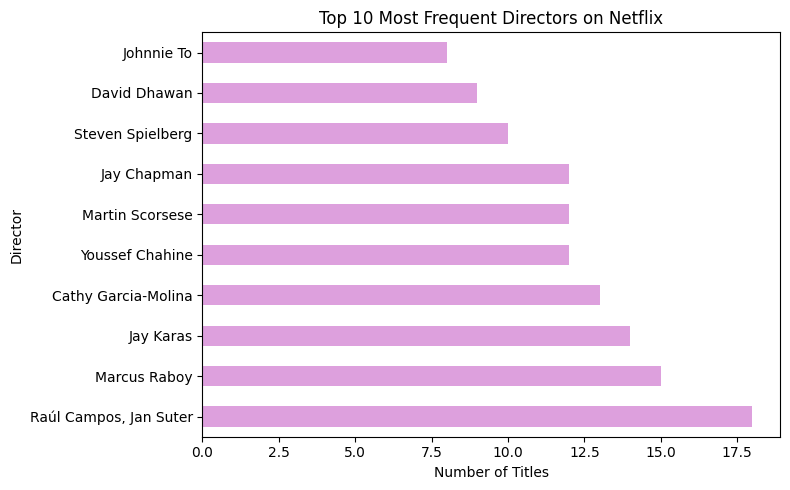

In [41]:
top_directors = df[df['Director'] != 'Unknown']['Director'].value_counts().head(10)
top_directors.plot(kind='barh', figsize=(8,5), color='plum')
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.tight_layout()
plt.show()


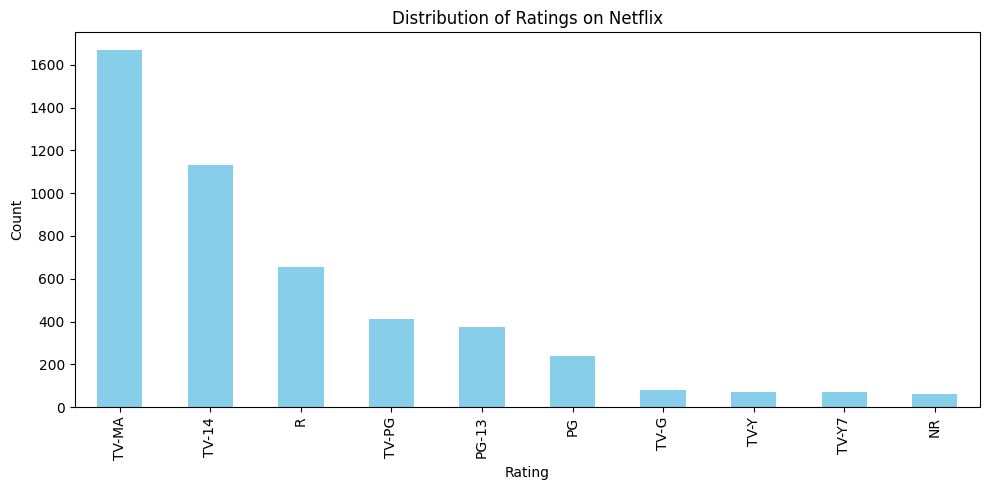

In [49]:
rating_dist = df['Rating'].value_counts().head(10)
rating_dist.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Interpretation:
The majority of titles fall under TV-MA (Mature Audiences) and TV-14, suggesting Netflix’s catalog heavily targets teenagers and adults. The relatively smaller share of G and PG ratings indicates a lesser focus on children’s programming compared to platforms like Disney+.

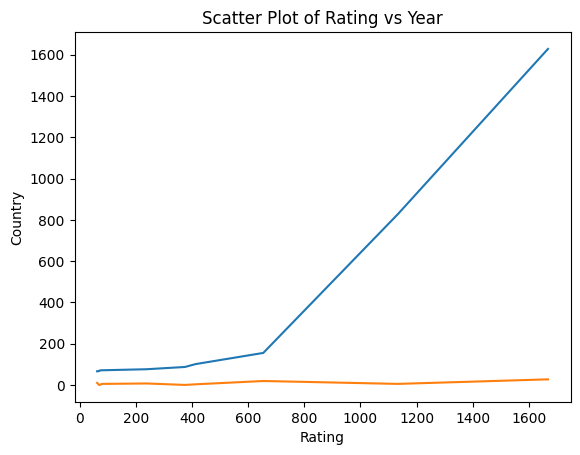

In [56]:
plt.plot(rating_dist,top_countries)
plt.xlabel("Rating")
plt.ylabel("Country")
plt.title("Scatter Plot of Rating vs Year")
plt.show()